# Todo

* go throu each variable and see what the issue is... they have seriously fucked up!
* get global attributes

In [22]:
import pathlib
import xarray as xr
import numpy as np

In [13]:
import netCDF4

In [116]:
def check_shape(var, shape):
    isshape = np.unique(var[:]).shape
    assert(isshape == shape), f'I assumed this variable had a dimension of {shape}. Actual shape is {isshape}'
    return

In [159]:
def get_ncattr(var):
    atr = {}
    for nca in var.ncattrs():
        atr[nca] = var.getncattr(nca)
    return atr

In [2]:
path2file = pathlib.Path('/nfs/grad/Inst/Ceil/SURFRAD/TBL/bl/L1_06610_201908260000.nc')

In [257]:
import xarray as xr

In [242]:
def read_L1(path2file):
    nc = netCDF4.Dataset(path2file)


    # get datetime index from the date_stamp variable ... is easier than the time variable
    dt = nc.variables['date_stamp'][:]
    dt = pd.to_datetime(dt[:,0])
    dt.name = 'datetime'

    # range coordinate
    # range has no attributes not even the unit :-|
    var = nc.variables['range']
    coord_range = pd.Index(var[:])
    coord_range.name = 'range'

    # variables with constant value
    # non has an attribute
    var_list = ['name', 'message_type', 'version',  'period', 'profile_scale', 'profile_resolution', 'profile_length']
    variables = []
    for vn in var_list:
        var = nc.variables[vn]
        check_shape(var,(1,))
        data = var[:][0,0]
        attrs = get_ncattr(var)
        variables.append(dict(name = vn, data = data, attrs = attrs))

    # tilt_angle
    # no attrs
    vn = 'tilt_angle'
    var = nc.variables[vn]
    data = pd.Series(var[:][:,0], index = dt)
    attrs =  get_ncattr(var)
    variables.append(dict(name = vn, data = data, attrs = attrs))

    # cloud status
    # no attr, so I think this gives info on, 0: no cb detected, 1: cb detected, 2: mulitple cb detected .... but  I am not sure
    vn = 'cloud_status'
    var = nc.variables[vn]
    check_shape(var, (3,))
    data = pd.Series(var[:][:,0], index = dt)
    attrs =  get_ncattr(var)
    variables.append(dict(name = vn, data = data, attrs = attrs))

    # cloud data
    # this looks like the cloud base for the 3 layers the ceilometer is able to detect
    # no attrs
    vn = 'cloud_data'
    var = nc.variables[vn]
    coord_cloud_layer = pd.Index([1,2,3])
    coord_cloud_layer.name = 'cloud_layer'
    data = pd.DataFrame(var[:], columns=coord_cloud_layer, index=dt)
    attrs =  get_ncattr(var)
    variables.append(dict(name = vn, data = data, attrs = attrs))

    # status_bits
    # no ncattrs ... hopfully the manual wil help with that
    vn = 'status_bits'
    var = nc.variables[vn]
    data = pd.Series(var[:][:,0], index = dt)
    attrs =  get_ncattr(var)
    variables.append(dict(name = vn, data = data, attrs = attrs))

    # rcs_910
    # no attrs ... we really need to know the units here ... I think
    vn = 'rcs_910'
    var = nc.variables[vn]
    data = pd.DataFrame(var[:], columns=coord_range, index=dt)
    attrs =  get_ncattr(var)
    variables.append(dict(name = vn, data = data, attrs = attrs))

    # put everything into a xarray dataset
    ds = xr.Dataset()

    for var in variables:
        ds[var['name']] = var['data']
        ds[var['name']].attrs = var['attrs']

    return ds

In [268]:
ds

<xarray.Dataset>
Dimensions:             (cloud_layer: 3, datetime: 2880, range: 1540)
Coordinates:
  * datetime            (datetime) datetime64[ns] 2019-08-26T00:00:28 ... 201...
  * cloud_layer         (cloud_layer) int64 1 2 3
  * range               (range) int64 10 20 30 40 50 ... 15370 15380 15390 15400
Data variables:
    name                <U12 'CEILOMETER_1'
    message_type        int32 16
    version             int32 103
    period              int32 36000
    profile_scale       int32 100
    profile_resolution  int32 10
    profile_length      int32 1540
    tilt_angle          (datetime) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    cloud_status        (datetime) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    cloud_data          (datetime, cloud_layer) float32 0.0 0.0 0.0 ... 0.0 0.0
    status_bits         (datetime) object '000000008080' ... '00000000C080'
    rcs_910             (datetime, range) int32 34 37 35 35 ... 621 1626 1555

In [103]:
# get datetime index from the date_stamp variable ... is easier than the time variable
dt = nc.variables['date_stamp'][:]
dt = pd.to_datetime(dt[:,0])
dt.name = 'datetime'

# range coordinate
# range has no attributes not even the unit :-|
var = nc.variables['range']
coord_range = pd.Index(var[:])
coord_range.name = 'range'

# name variable
# I don't see the reason why this needs to have the time dimension ... its a constant!
var = nc.variables['name']
check_shape(var,(1,))
var_name = var[:][0,0]

# message_type
# no attrs
var = nc.variables['message_type']
check_shape(var,(1,))
var_message_type = var[:][0,0]

# version
# no attrs
var = nc.variables['version']
check_shape(var,(1,))
var_version = var[:][0,0]

# period
# no attrs
var = nc.variables['period']
check_shape(var,(1,))
var_period = var[:][0,0]

# profile_scale
# noattrs
var = nc.variables['profile_scale']
check_shape(var, (1,))
var_profile_scale = var[:][0,0]

# profile_resolution
# noattrs
var = nc.variables['profile_resolution']
check_shape(var, (1,))
var_profile_resolution = var[:][0,0]

# profile_length
# noattrs
var = nc.variables['profile_length']
check_shape(var, (1,))
var_profile_length = var[:][0,0]

# tilt_angle
# no attrs
var = nc.variables['tilt_angle']
var_tilt_angle = pd.Series(var[:][:,0], index = dt)
var_tilt_angle_attr =  get_ncattr(var)

# cloud status
# no attr, so I think this gives info on, 0: no cb detected, 1: cb detected, 2: mulitple cb detected .... but  I am not sure
var = nc.variables['cloud_status']
check_shape(var, (3,))
var_cloud_status = pd.Series(var[:][:,0], index = dt)

# cloud data
# this looks like the cloud base for the 3 layers the ceilometer is able to detect
# no attrs
var = nc.variables['cloud_data']
coord_cloud_layer = pd.Index([1,2,3])
coord_cloud_layer.name = 'cloud_layer'
var_cloud_data = pd.DataFrame(var[:], columns=coord_cloud_layer, index=dt)

# status_bits
# no ncattrs ... hopfully the manual wil help with that
var = nc.variables['status_bits']
var_status_bits = pd.Series(var[:][:,0], index = dt)

# rcs_910
# no attrs ... we really need to know the units here ... I think
var = nc.variables['rcs_910']
var_rcs_910 = pd.DataFrame(var[:], columns=coord_range, index=dt)

In [219]:
# global attributes
get_ncattr(nc)

{'site_location': 'DEVICE_1', 'instrument_type': 'CL31'}

In [222]:
plt.rcParams['figure.dpi'] = 200

In [227]:
import matplotlib.colors as colors

<ipython-input-239-483bf345fcec>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = plt.pcolormesh(var.index, var.columns, var.transpose())


(10.0, 4000.0)

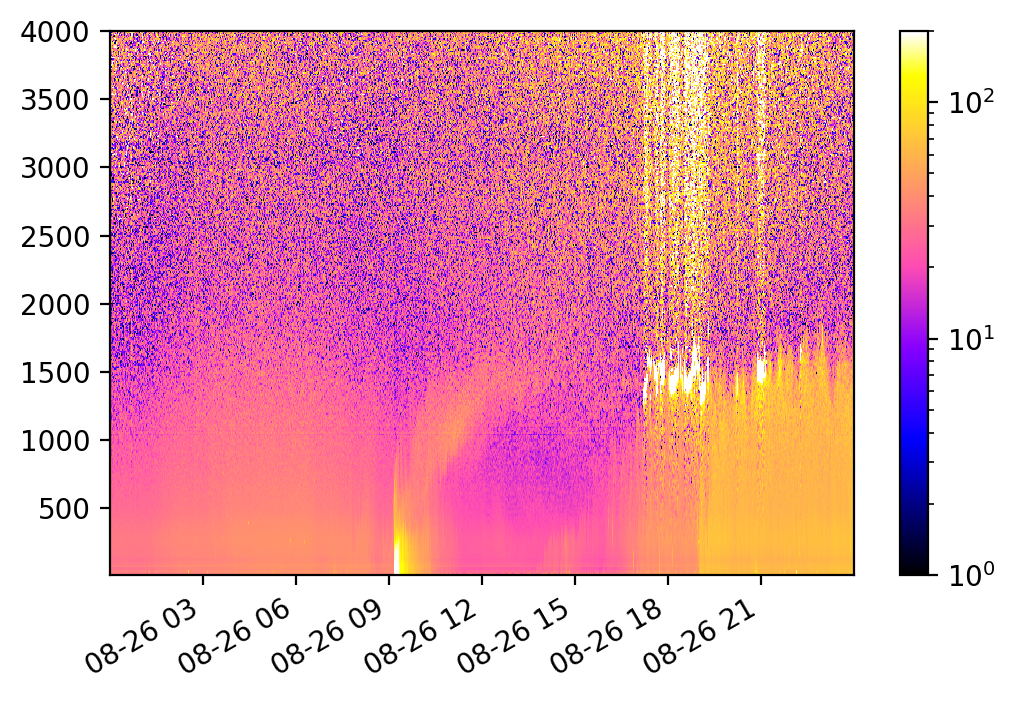

In [239]:
var = var_rcs_910
pc = plt.pcolormesh(var.index, var.columns, var.transpose())
pc.set_norm(colors.LogNorm())
pc.set_clim(vmax = 2e2)
pc.set_cmap(plt.cm.gnuplot2)
f = plt.gcf()
f.colorbar(pc)
f.autofmt_xdate()
a = plt.gca()
a.set_ylim(top = 4000)

In [224]:
var_rcs_910

range,10,20,30,40,50,60,70,80,90,100,...,15310,15320,15330,15340,15350,15360,15370,15380,15390,15400
datetime,,,,,,,,,,,,,,,,,,,,,
2019-08-26 00:00:28,34,37,35,35,30,30,34,34,32,31,...,-507,324,740,1126,1302,843,-86,100,283,-729
2019-08-26 00:00:58,34,37,35,34,30,30,34,34,32,31,...,-652,-540,107,433,2100,2048,255,1031,912,-660
2019-08-26 00:01:28,34,37,35,35,30,30,34,34,32,31,...,-914,-1307,490,555,881,1974,1279,421,-843,-83
2019-08-26 00:01:58,33,35,34,34,29,29,34,34,32,31,...,-581,464,-181,-679,295,236,781,348,67,1252
2019-08-26 00:02:28,33,35,33,33,30,30,34,34,32,31,...,524,719,660,1436,2024,1093,-162,-1233,-1548,-1388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-26 23:57:58,83,73,70,70,69,69,69,69,67,66,...,-2548,-1162,231,1581,362,-200,1652,2195,569,-1464
2019-08-26 23:58:28,82,74,71,70,69,69,69,70,68,66,...,336,-721,-269,557,-883,-457,1698,1552,-2,-431
2019-08-26 23:58:58,83,75,72,71,70,70,70,70,68,66,...,514,133,-583,326,-19,-355,626,-531,-1107,-998


In [212]:
ignore_list = ['date_stamp', 'time','name', 'range', 'message_type', 'version', 'period', 'tilt_angle','cloud_status', 'cloud_data', 'status_bits', 'profile_scale','profile_resolution', 'profile_length']
for k in nc.variables.keys():
    if k in ignore_list:
        continue
    var = nc.variables[k]
    print(k)
    print(var.ncattrs())
    print(np.unique(var[:]).shape)
    print(var.dimensions, end = '\n ================= \n')


rcs_910
[]
(18375,)
('time', 'range')


In [58]:
variables = list(nc.variables.keys())
variables_cleaned_dict = {}
todo = ['time', 'range']
for td in todo:
    variables.remove(td)
    var = nc.variables[td]
    var_dict = {}
    var_dict = var[:].data
    attributes = {}
    for attr in var.ncattrs():
        attributes[attr] = var.getncattr(attr)
    
    break
    

In [62]:
attr = var.ncattrs()[0]

In [63]:
var.getncattr(attr)

'days since 1970-01-01 00:00:00.000'

In [72]:
# get the time
# variables.remove('time')
dt = unixconv(nc.variables['time'][:].data)

In [73]:
dt

array(['2019-08-26T00:00:28', '2019-08-26T00:00:58',
       '2019-08-26T00:01:28', ..., '2019-08-26T23:58:58',
       '2019-08-26T23:59:28', '2019-08-26T23:59:58'],
      dtype='datetime64[s]')

In [82]:
var = nc.variables['cloud_data']

In [85]:
var

<class 'netCDF4._netCDF4.Variable'>
float32 cloud_data(time, cloud_data)
unlimited dimensions: time
current shape = (2880, 3)
filling on, default _FillValue of 9.969209968386869e+36 used

In [83]:
var.ncattrs()

[]

In [84]:
np.unique(var[:])

masked_array(data=[   0., 1280., 1290., 1310., 1320., 1330., 1340., 1350.,
                   1370., 1380., 1390., 1400., 1410., 1420., 1430., 1440.,
                   1450., 1460., 1470., 1480., 1490., 1500., 1510., 1520.,
                   1530., 1540., 1550., 1560., 1570., 1580., 1590., 1620.,
                   1630., 1640., 1650., 1670., 1700., 1710., 1800., 4070.,
                   4080., 4200., 4280., 4300., 4370., 4380., 4390., 4400.,
                   4410., 4420., 4450., 4460., 4490., 4510., 4550., 4570.,
                   4610., 4650., 4660., 4720.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [76]:
var = nc.variables['tilt_angle']

In [80]:
var.ncattrs()

['Units', 'Type', 'Dimension']

In [81]:
var.getncattr('Units')

'Degree'

In [79]:
np.unique(var[:])

masked_array(data=[0, 1],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [69]:
nc.variables['date_stamp'][:]

array([['2019-08-26 00:00:28'],
       ['2019-08-26 00:00:58'],
       ['2019-08-26 00:01:28'],
       ...,
       ['2019-08-26 23:58:58'],
       ['2019-08-26 23:59:28'],
       ['2019-08-26 23:59:58']], dtype=object)

In [75]:
dt

array(['2019-08-26T00:00:28', '2019-08-26T00:00:58',
       '2019-08-26T00:01:28', ..., '2019-08-26T23:58:58',
       '2019-08-26T23:59:28', '2019-08-26T23:59:58'],
      dtype='datetime64[s]')

In [30]:
name = nc.variables['name'][:][0][0]

In [33]:
var = nc.variables['range']

In [38]:
var.ncattrs()

[]

In [39]:
var.dimensions

('range',)

In [20]:
nc.variables['time'][:].data

array([1566777628, 1566777658, 1566777688, ..., 1566863938, 1566863968,
       1566863998], dtype=int32)

In [12]:
##### L1 netCDF files. #######################################################
# List of variables to ignore since Xarray can't open them because for some
# reason they reference themselves in their dimensions.
ignore1 = ['name','message_type','version','date_stamp','period','tilt_angle',
          'cloud_status','cloud_data','status_bits','profile_scale',
          'profile_resolution','profile_length']
L1 = xr.open_dataset(path2file)#, drop_variables=ignore1)

MissingDimensionsError: 'name' has more than 1-dimension and the same name as one of its dimensions ('time', 'name'). xarray disallows such variables because they conflict with the coordinates used to label dimensions.

In [11]:
L1

<xarray.Dataset>
Dimensions:  (range: 1540, time: 2880)
Coordinates:
  * time     (time) int32 1566777628 1566777658 ... 1566863968 1566863998
  * range    (range) int32 10 20 30 40 50 60 ... 15360 15370 15380 15390 15400
Data variables:
    rcs_910  (time, range) int32 ...
Attributes:
    site_location:    DEVICE_1
    instrument_type:  CL31

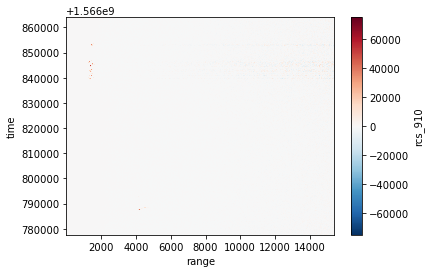

In [10]:
pc = L1.rcs_910.plot()
pc.

In [ ]:
# Create a datetime64 array from unix time for L1 which uses 36sec message intervals.
timeL1 = unixconv(L1['time'].values)

# Variables and attributes
var = {} # Create empty variable dictionary.

var['L1_unix_time']=('L1_time', L1['time'].values,
                        {'long_name':'L1 Unix time',
                         'units':'Seconds since 1970-01-01 00:00:00',
                         'comments': """This uses 36s intervals which is what 
                          the L1 file uses where the L2 and L3 use 16s. Vaisala 
                          incorrectly describes as days instead of sec."""
                         })
var['L1_backscatter']=(['L1_time','L1_range'], L1['rcs_910'].values,
                        {'long_name':'L1 2-D ceilometer signal backscatter profile.',
                         'units':'10-9 m-1 sr-1',
                         'comments':'Referred to as rcs_910 or range-corrected-scattering'})

In [190]:
var.ncattrs()

[]